# Seaborn을 사용한 데이터 분포 시각화
- Seaborn: Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가
- 기본적인 시각화 기능은 Matplotlib 패키지에 의존
- 통계 기능은 Statsmodels 패키지에 의존
- http://seaborn.pydata.org/

## 1. 1차원 분포 플롯
- 1차원 데이터는 실수 값이면 히스토그램과 같은 실수 분포 플롯
- 카테고리 값이면 카운트 플롯으로 나타냄

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from matplotlib import font_manager, rc
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [2]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

###  1차원 실수 분포 플롯
- 자료의 분포를 묘사하기 위한 것
- 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등을 제공
- rugplot, kdeplot, distplot
- rugplot은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.
- http://seaborn.pydata.org/generated/seaborn.rugplot.html

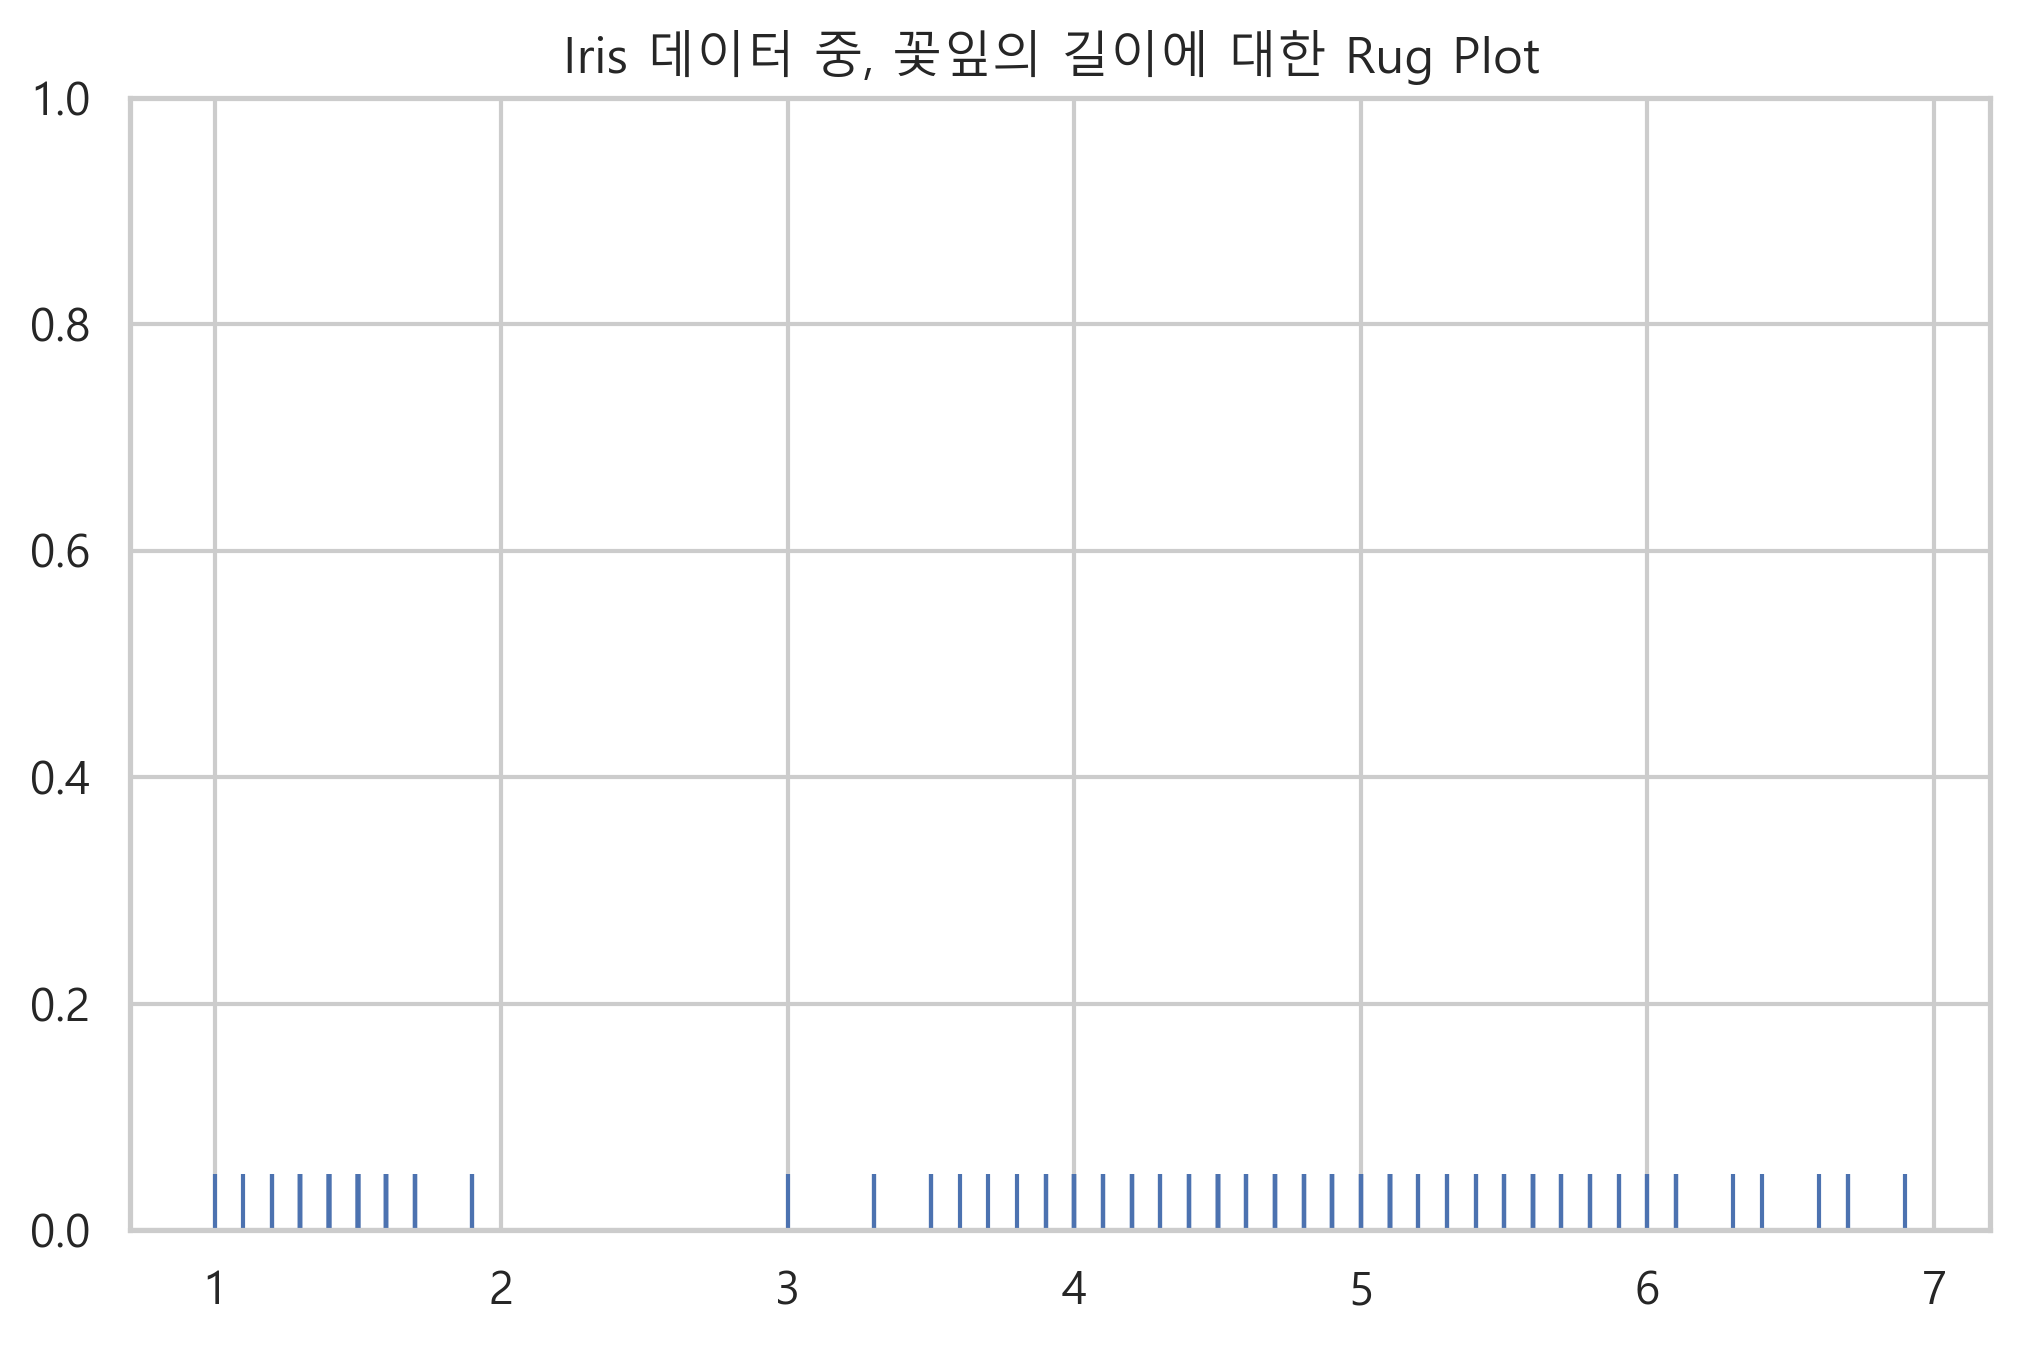

In [5]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

###  커널 밀도(kernel density) 플롯
- 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선
- kdeplot: http://seaborn.pydata.org/generated/seaborn.kdeplot.html
- 커널 밀도 추정: http://scikit-learn.org/stable/modules/density.html

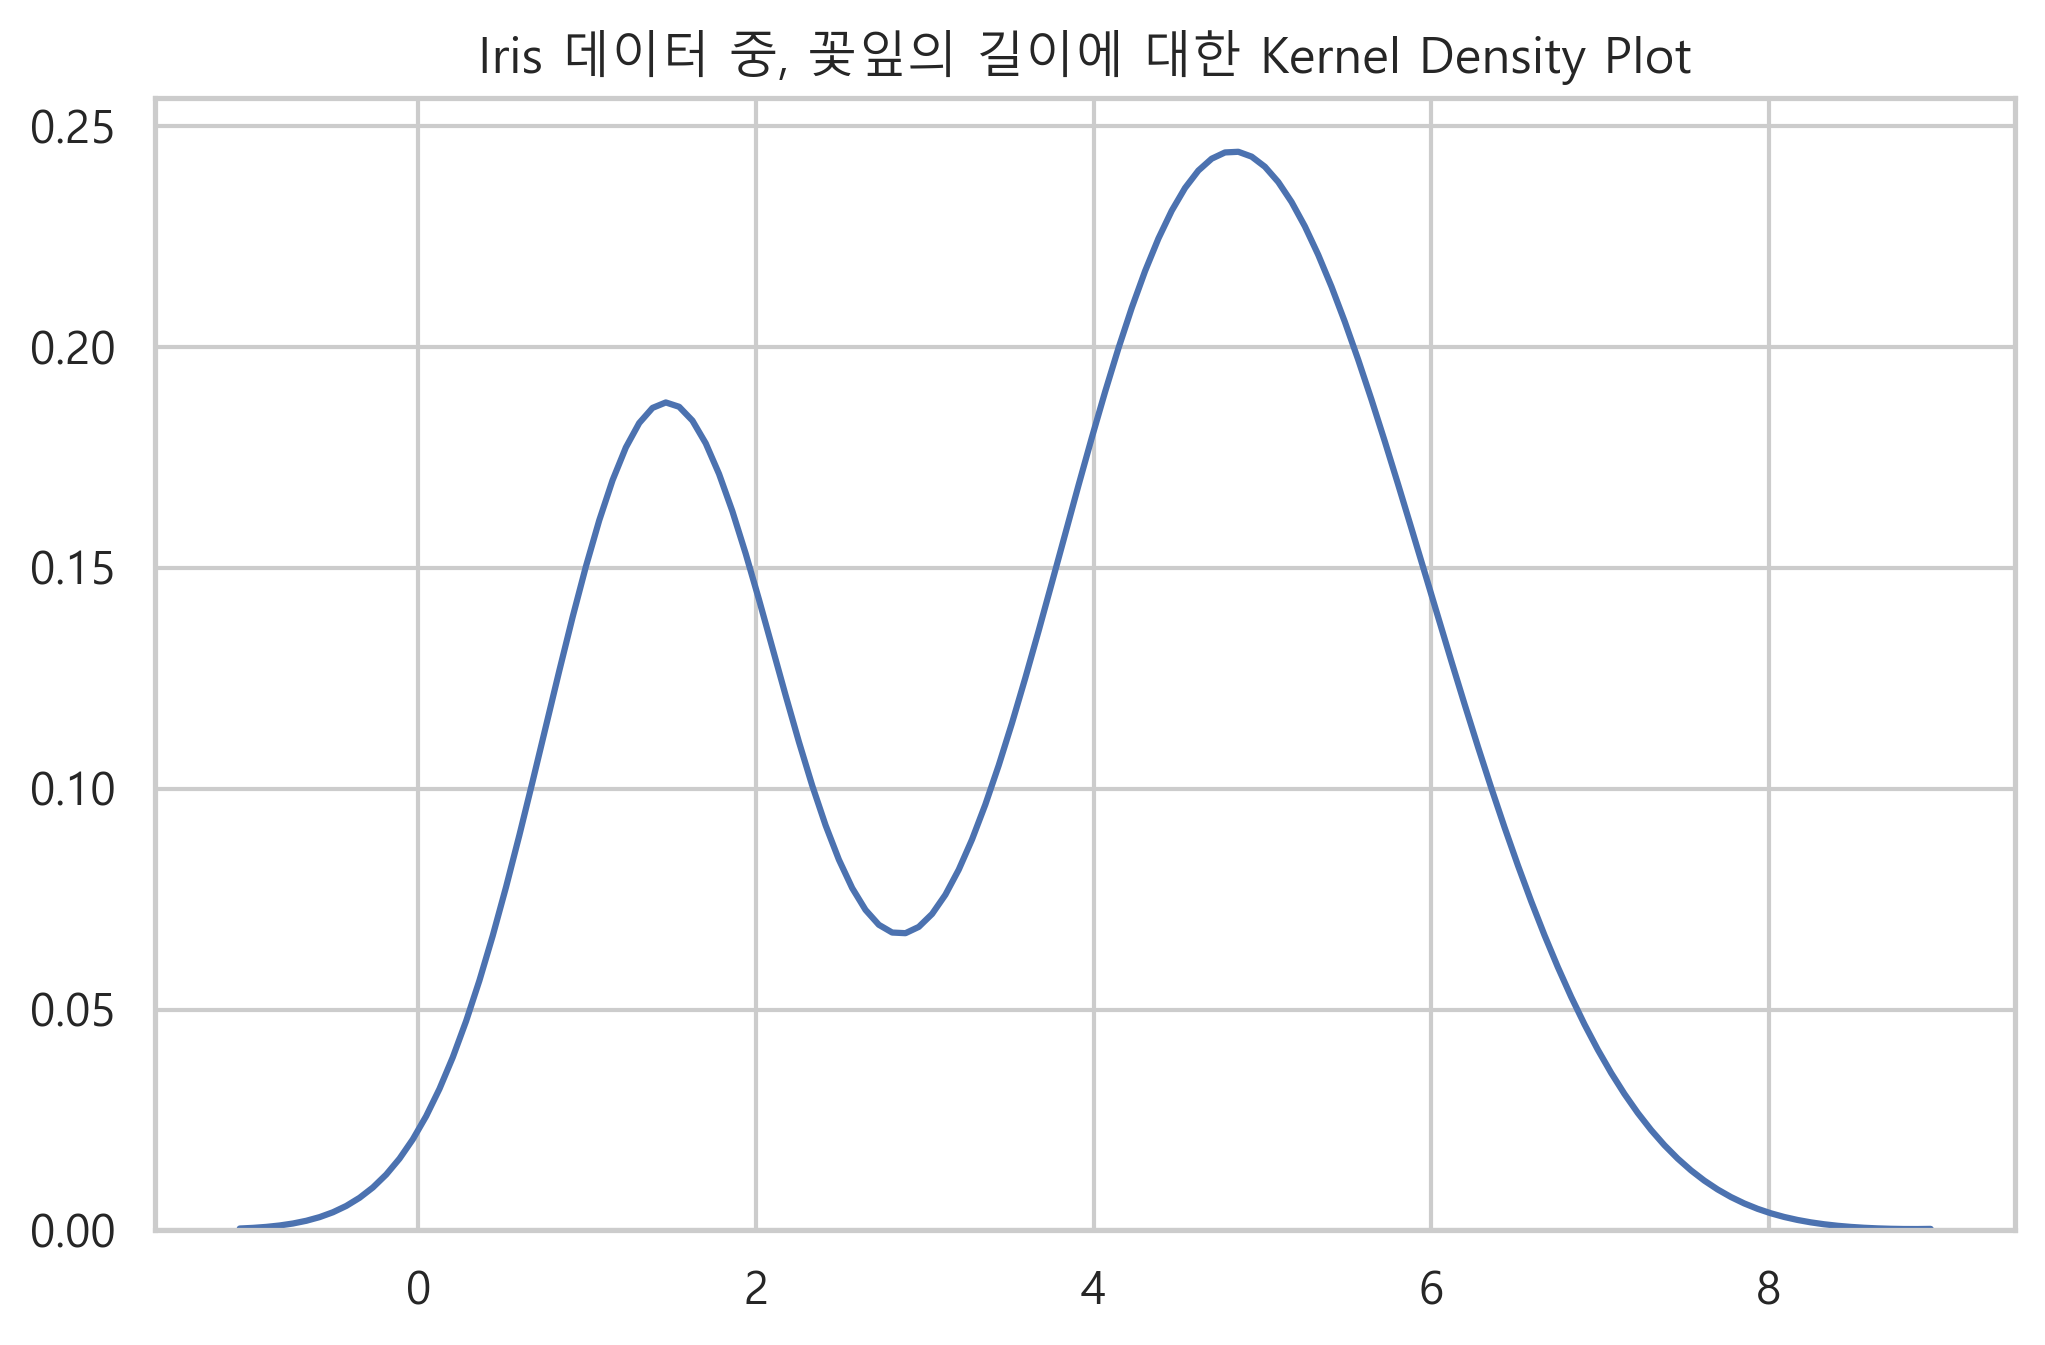

In [6]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

### distplot 명령
- 러그와 커널 밀도 표시 기능
- http://seaborn.pydata.org/generated/seaborn.distplot.html

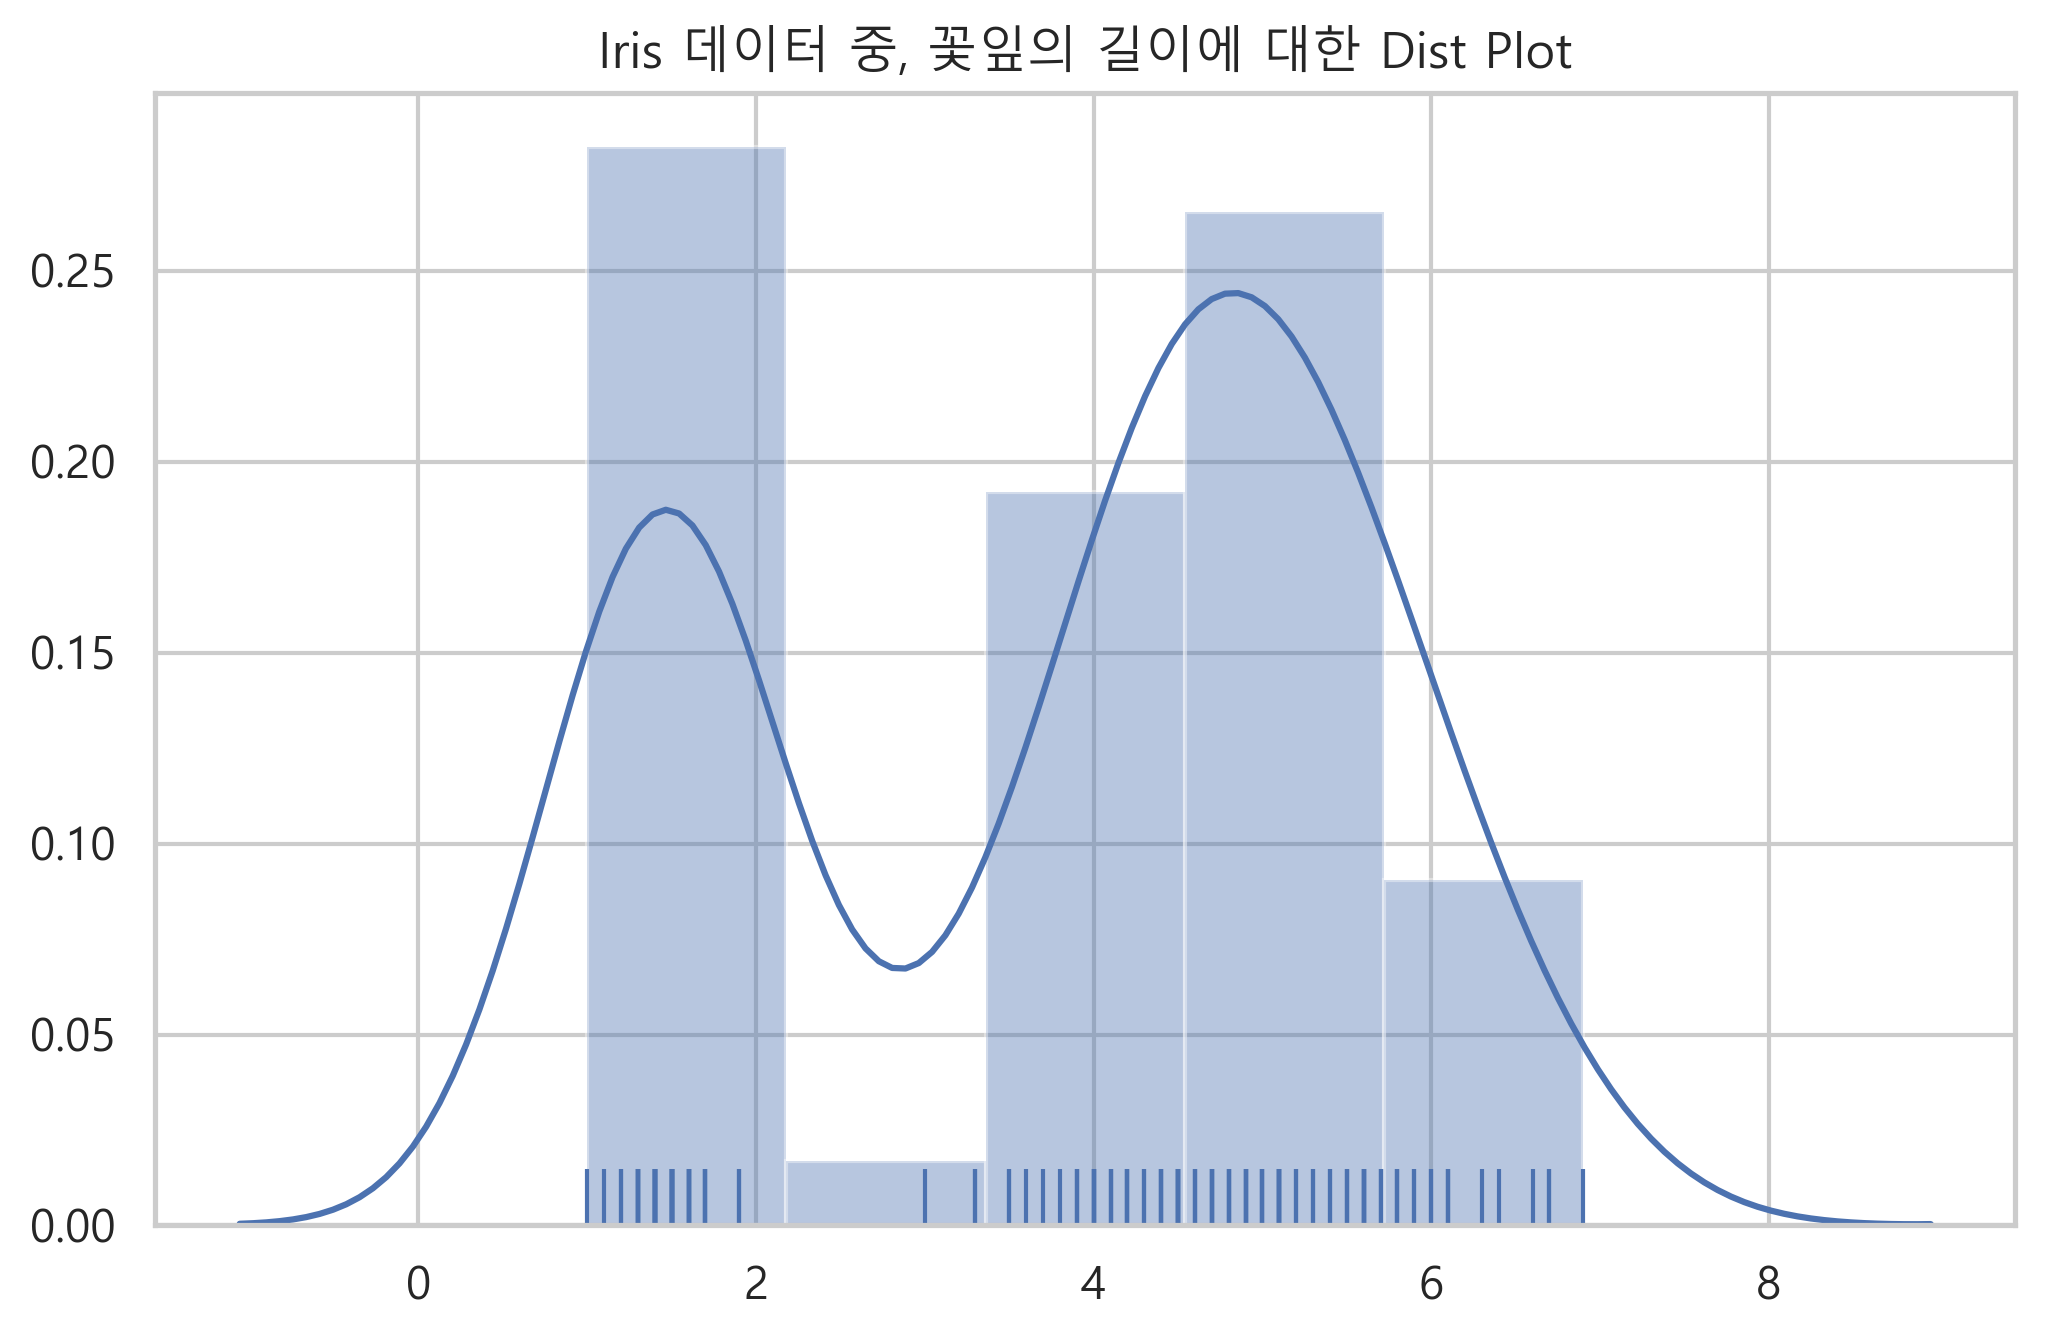

In [7]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

### 카운트 플롯
- countplot 명령: 각 카테고리 값별로 데이터가 얼마나 있는지 표시, 데이터프레임에만 사용
- http://seaborn.pydata.org/generated/seaborn.countplot.html
> countplot(x="column_name", data=dataframe)
    - data 인수: 대상이 되는 데이터프레임
    - x 인수: 데이터프레임의 열 이름 문자열

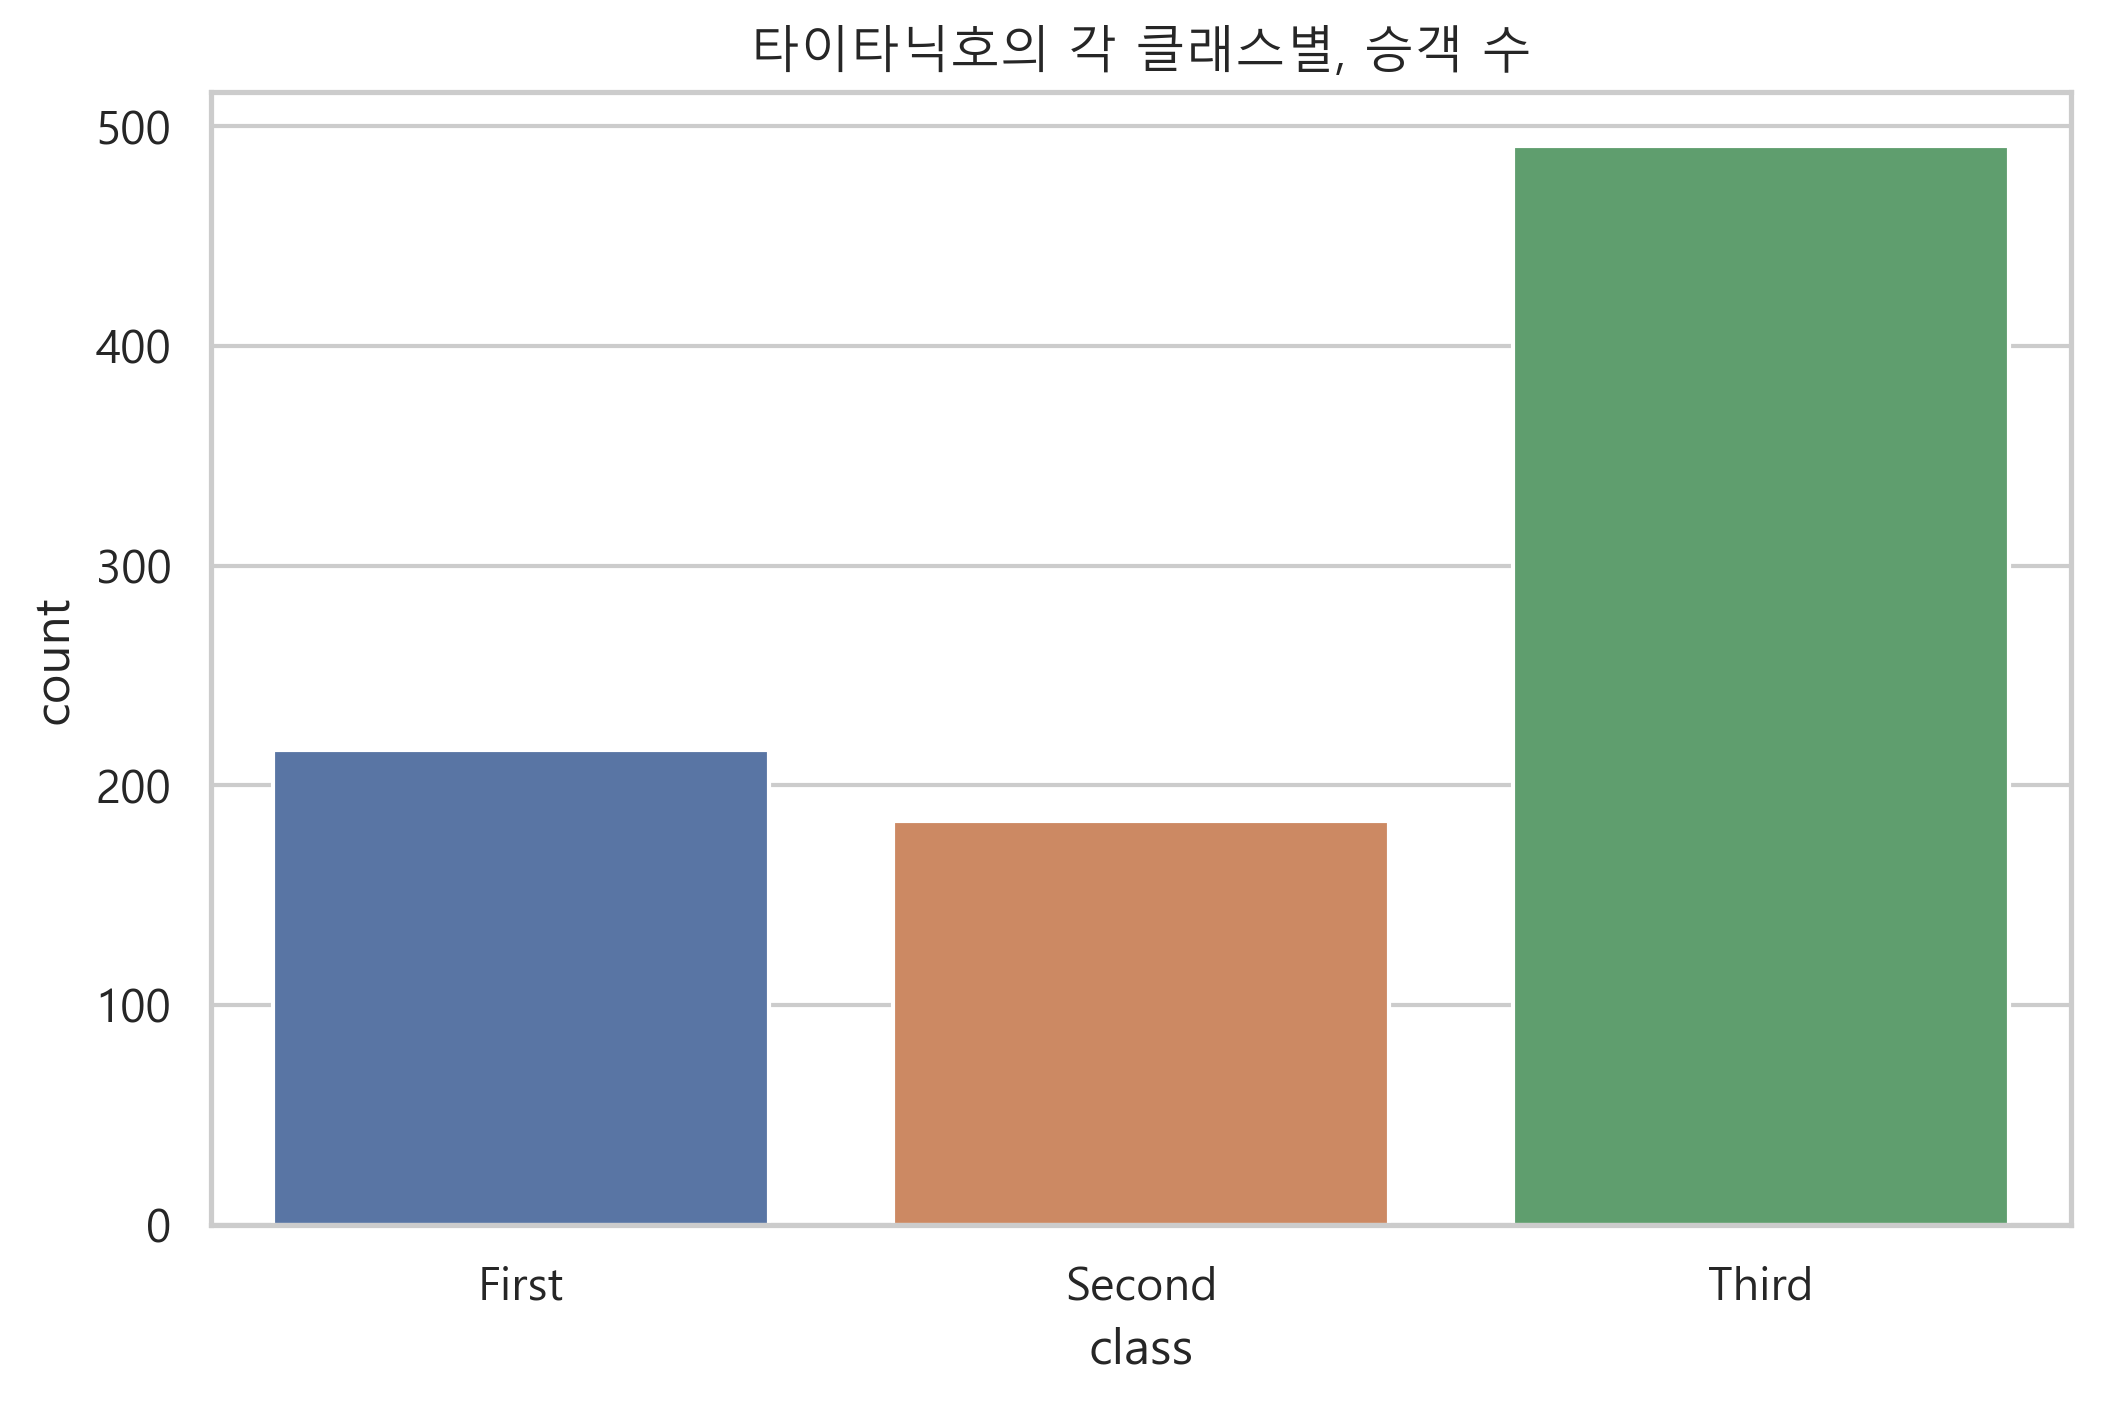

In [8]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

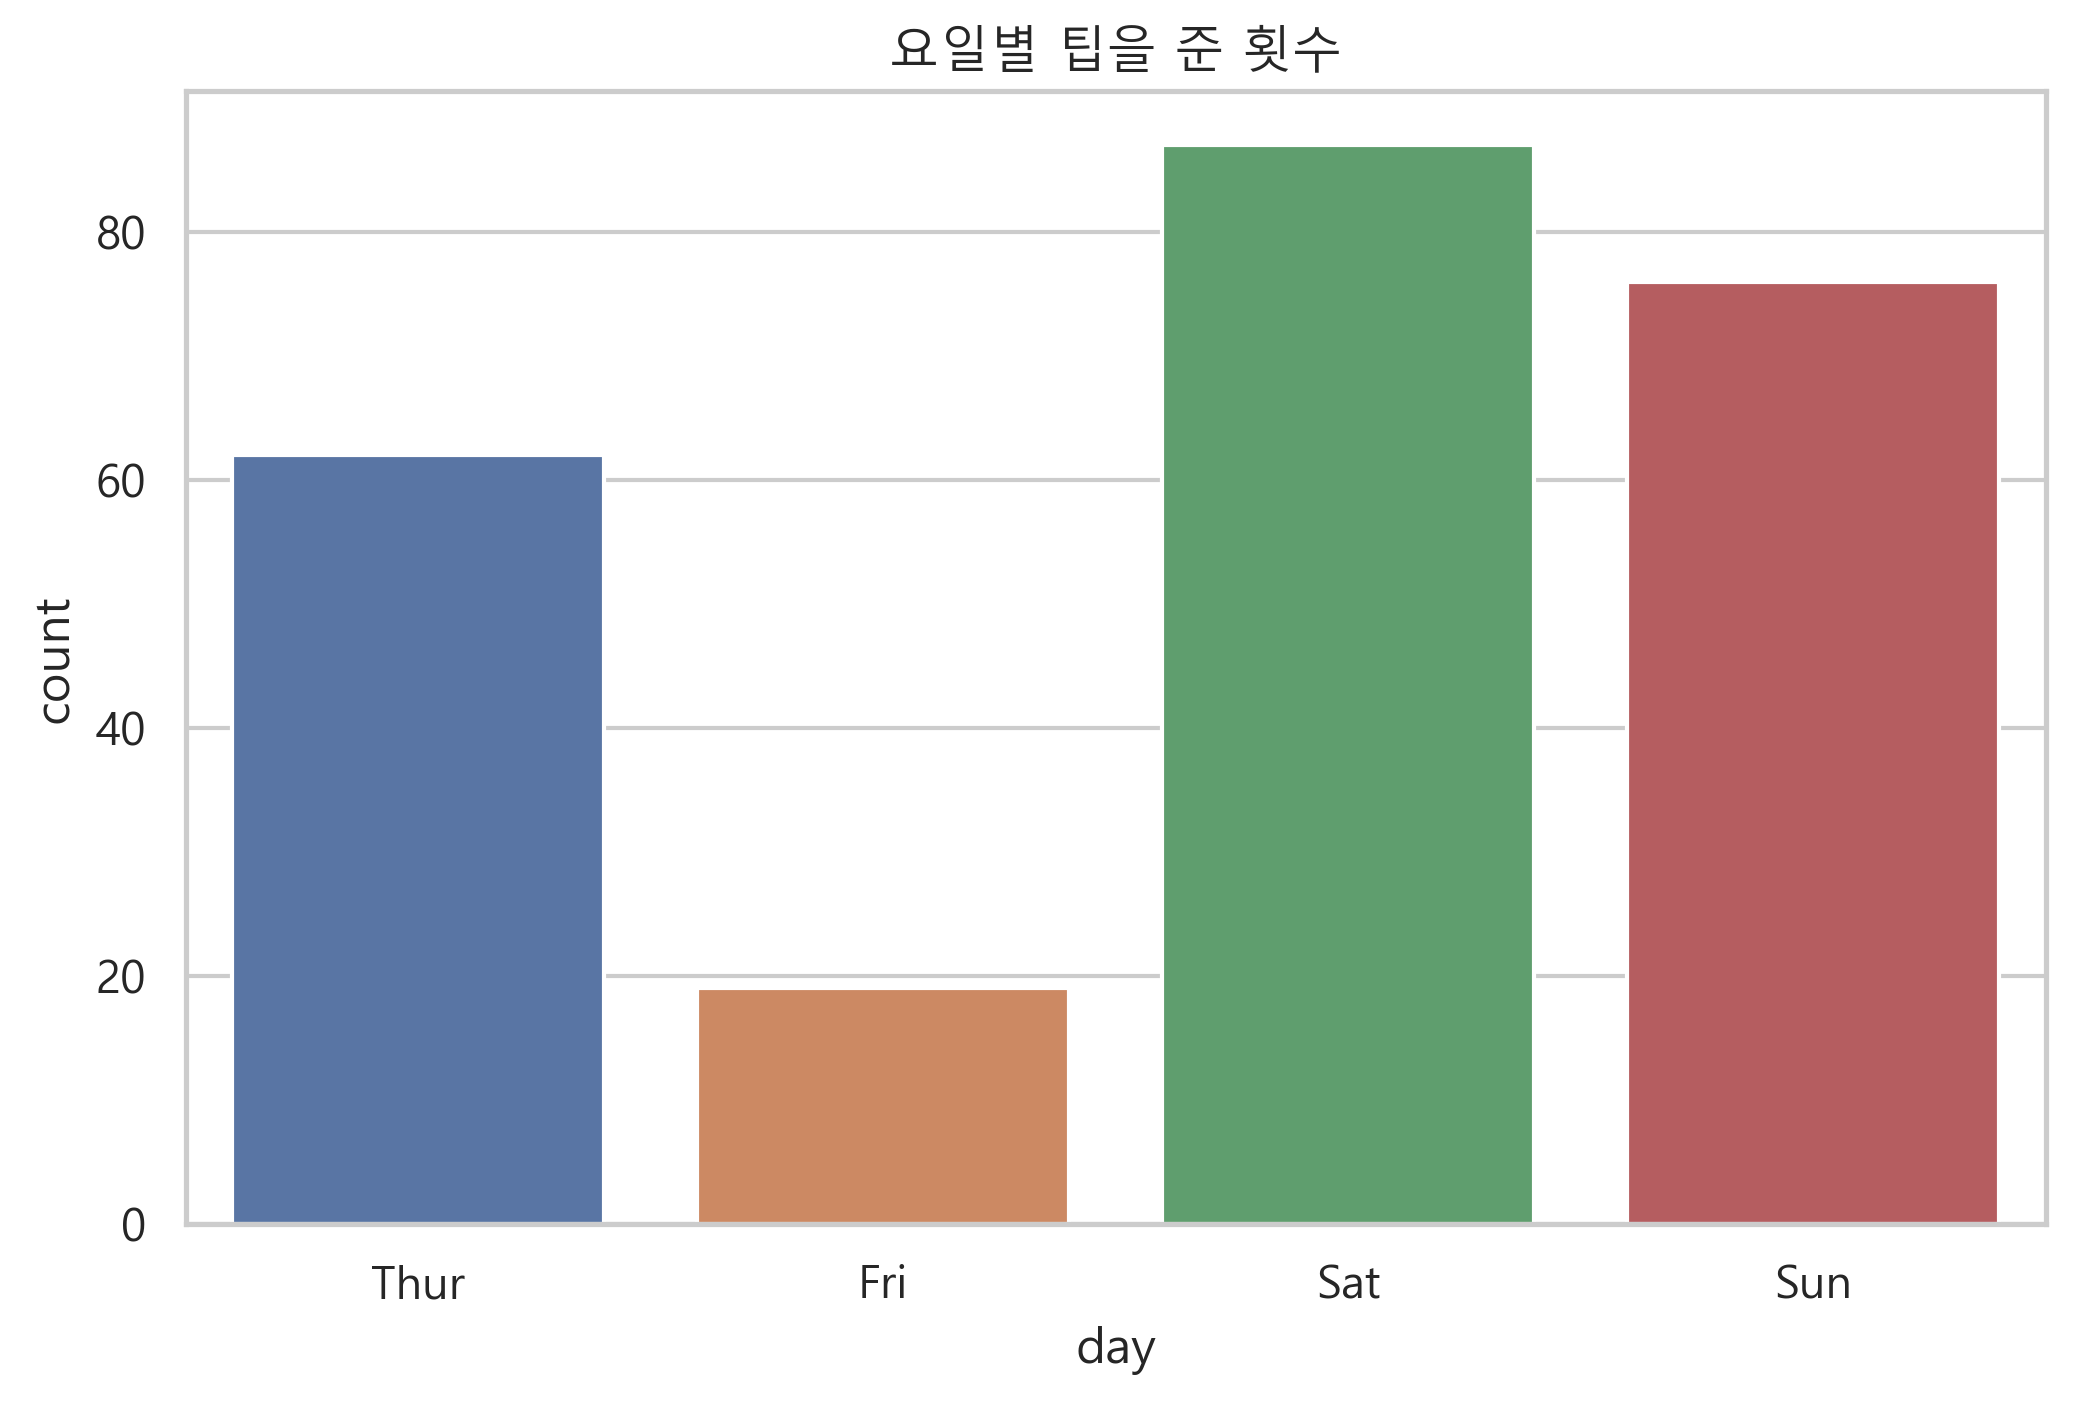

In [9]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

## 2. 다차원 데이터
- 분석하고자 하는 데이터가 모두 실수 값인 경우
- 분석하고자 하는 데이터가 모두 카테고리 값인 경우
- 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

### 2차원 실수형 데이터
- 스캐터 플롯(scatter plot)
- jointplot 명령: 
> jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')
- 차트의 가장자리(margin)에 각 변수의 히스토그램도 그린다
- http://seaborn.pydata.org/generated/seaborn.jointplot.html

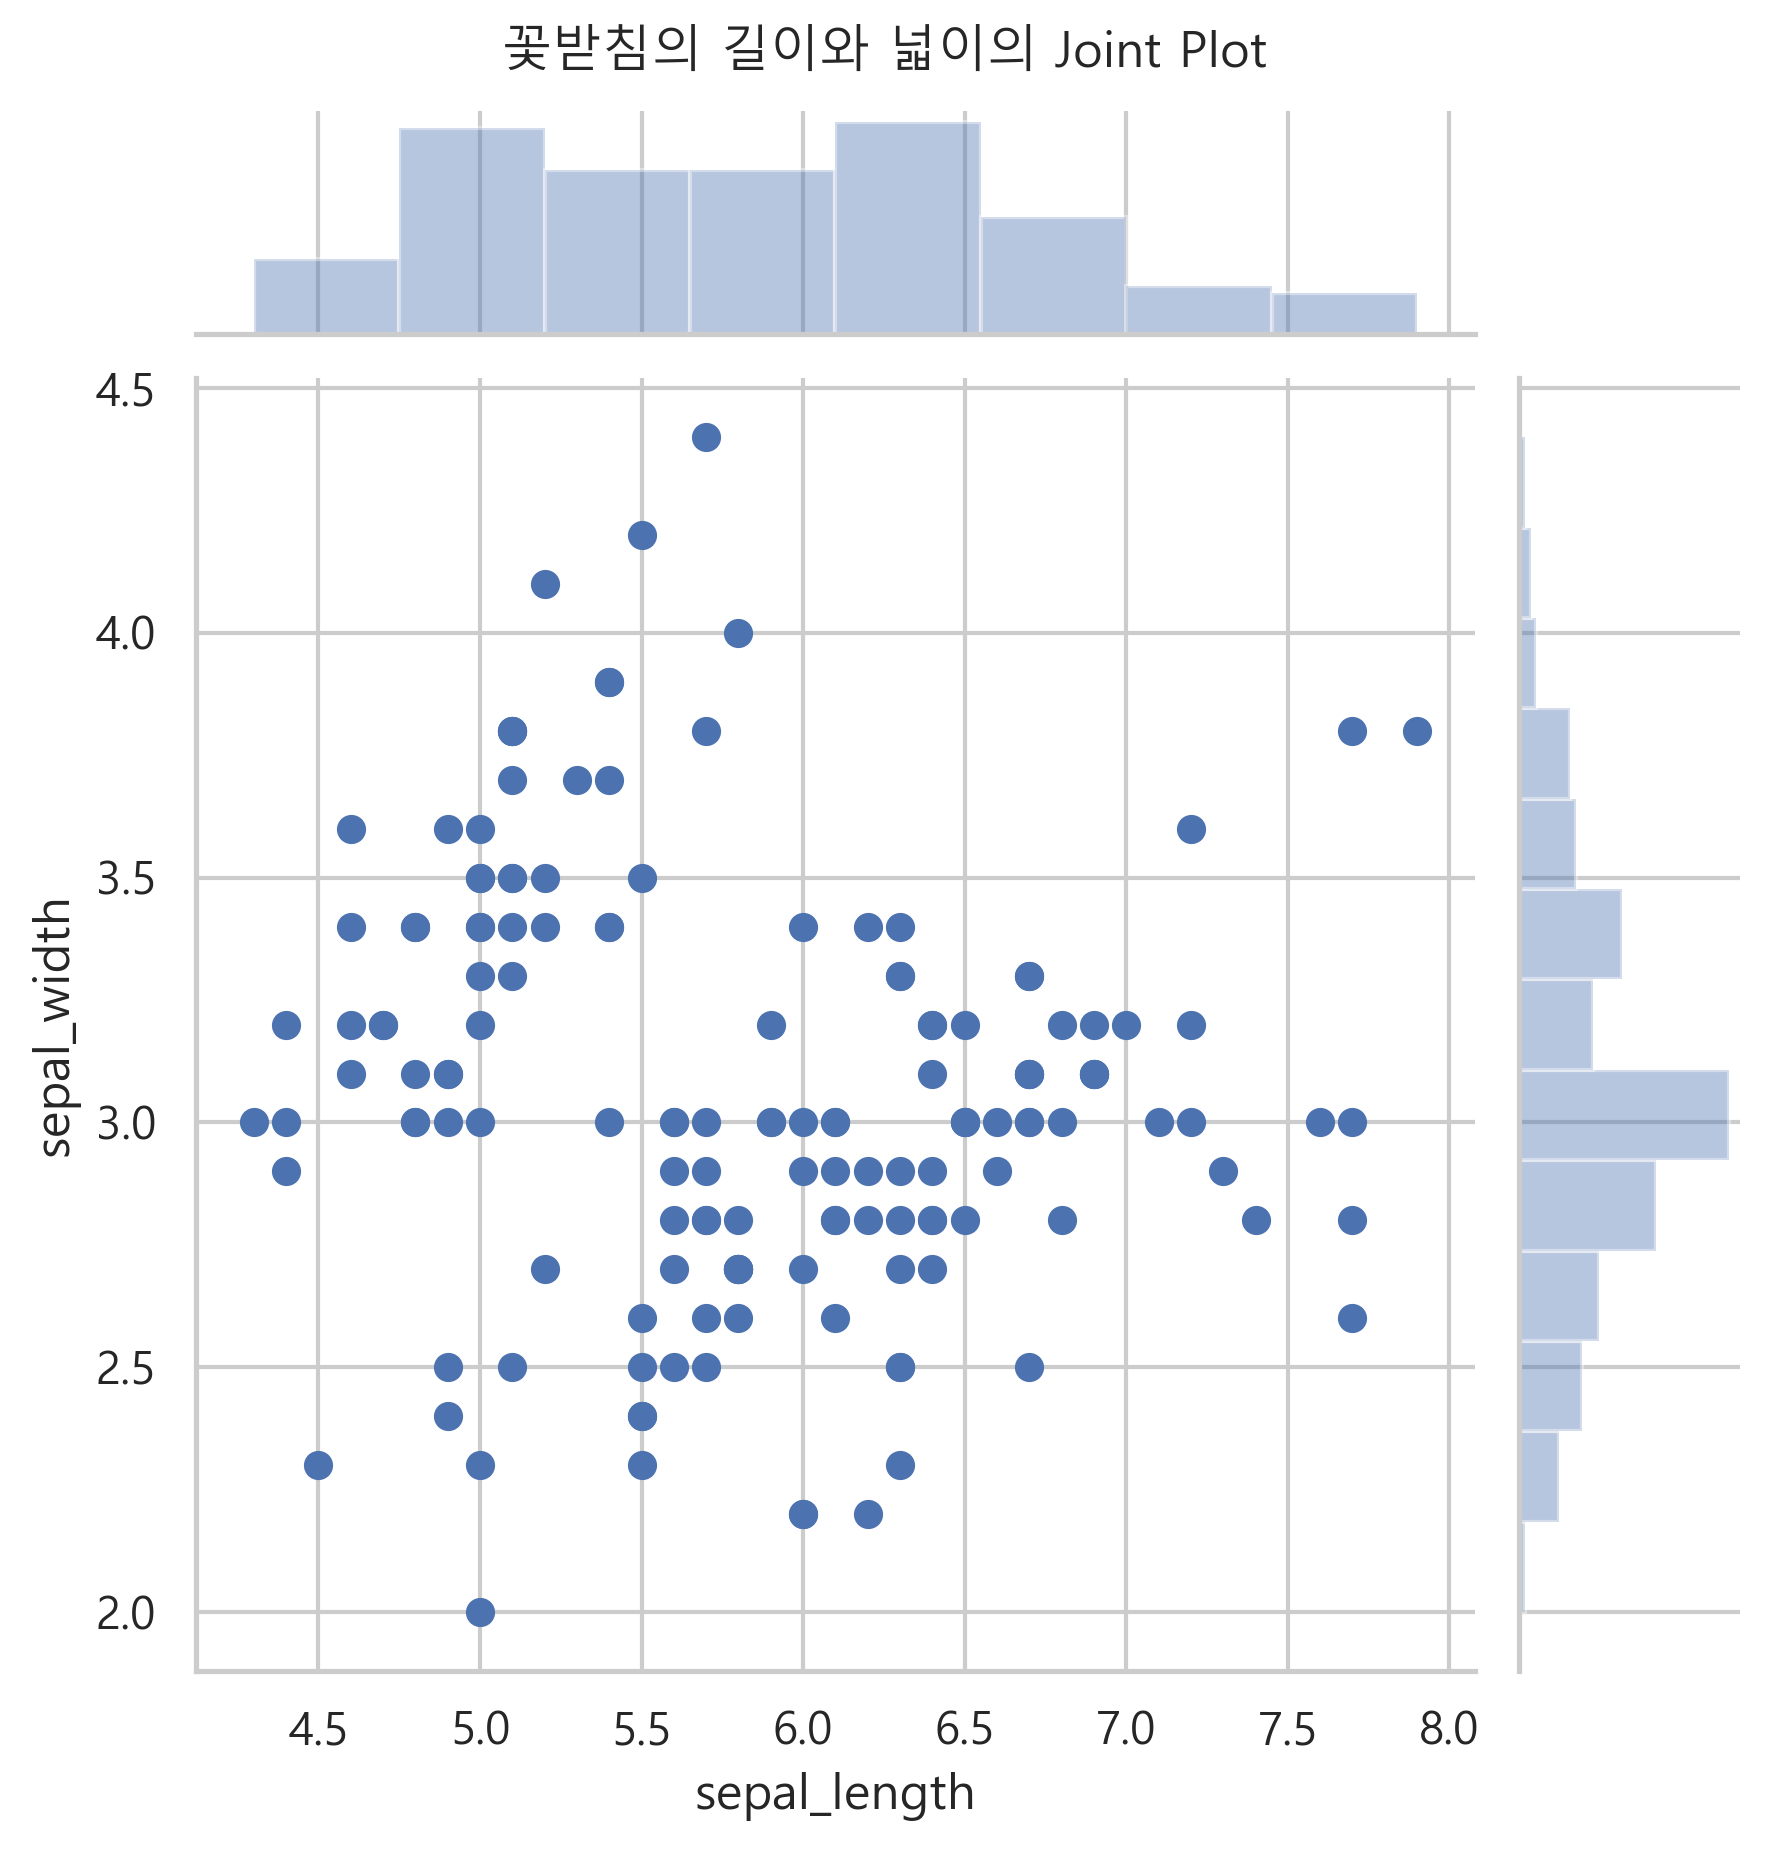

In [10]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

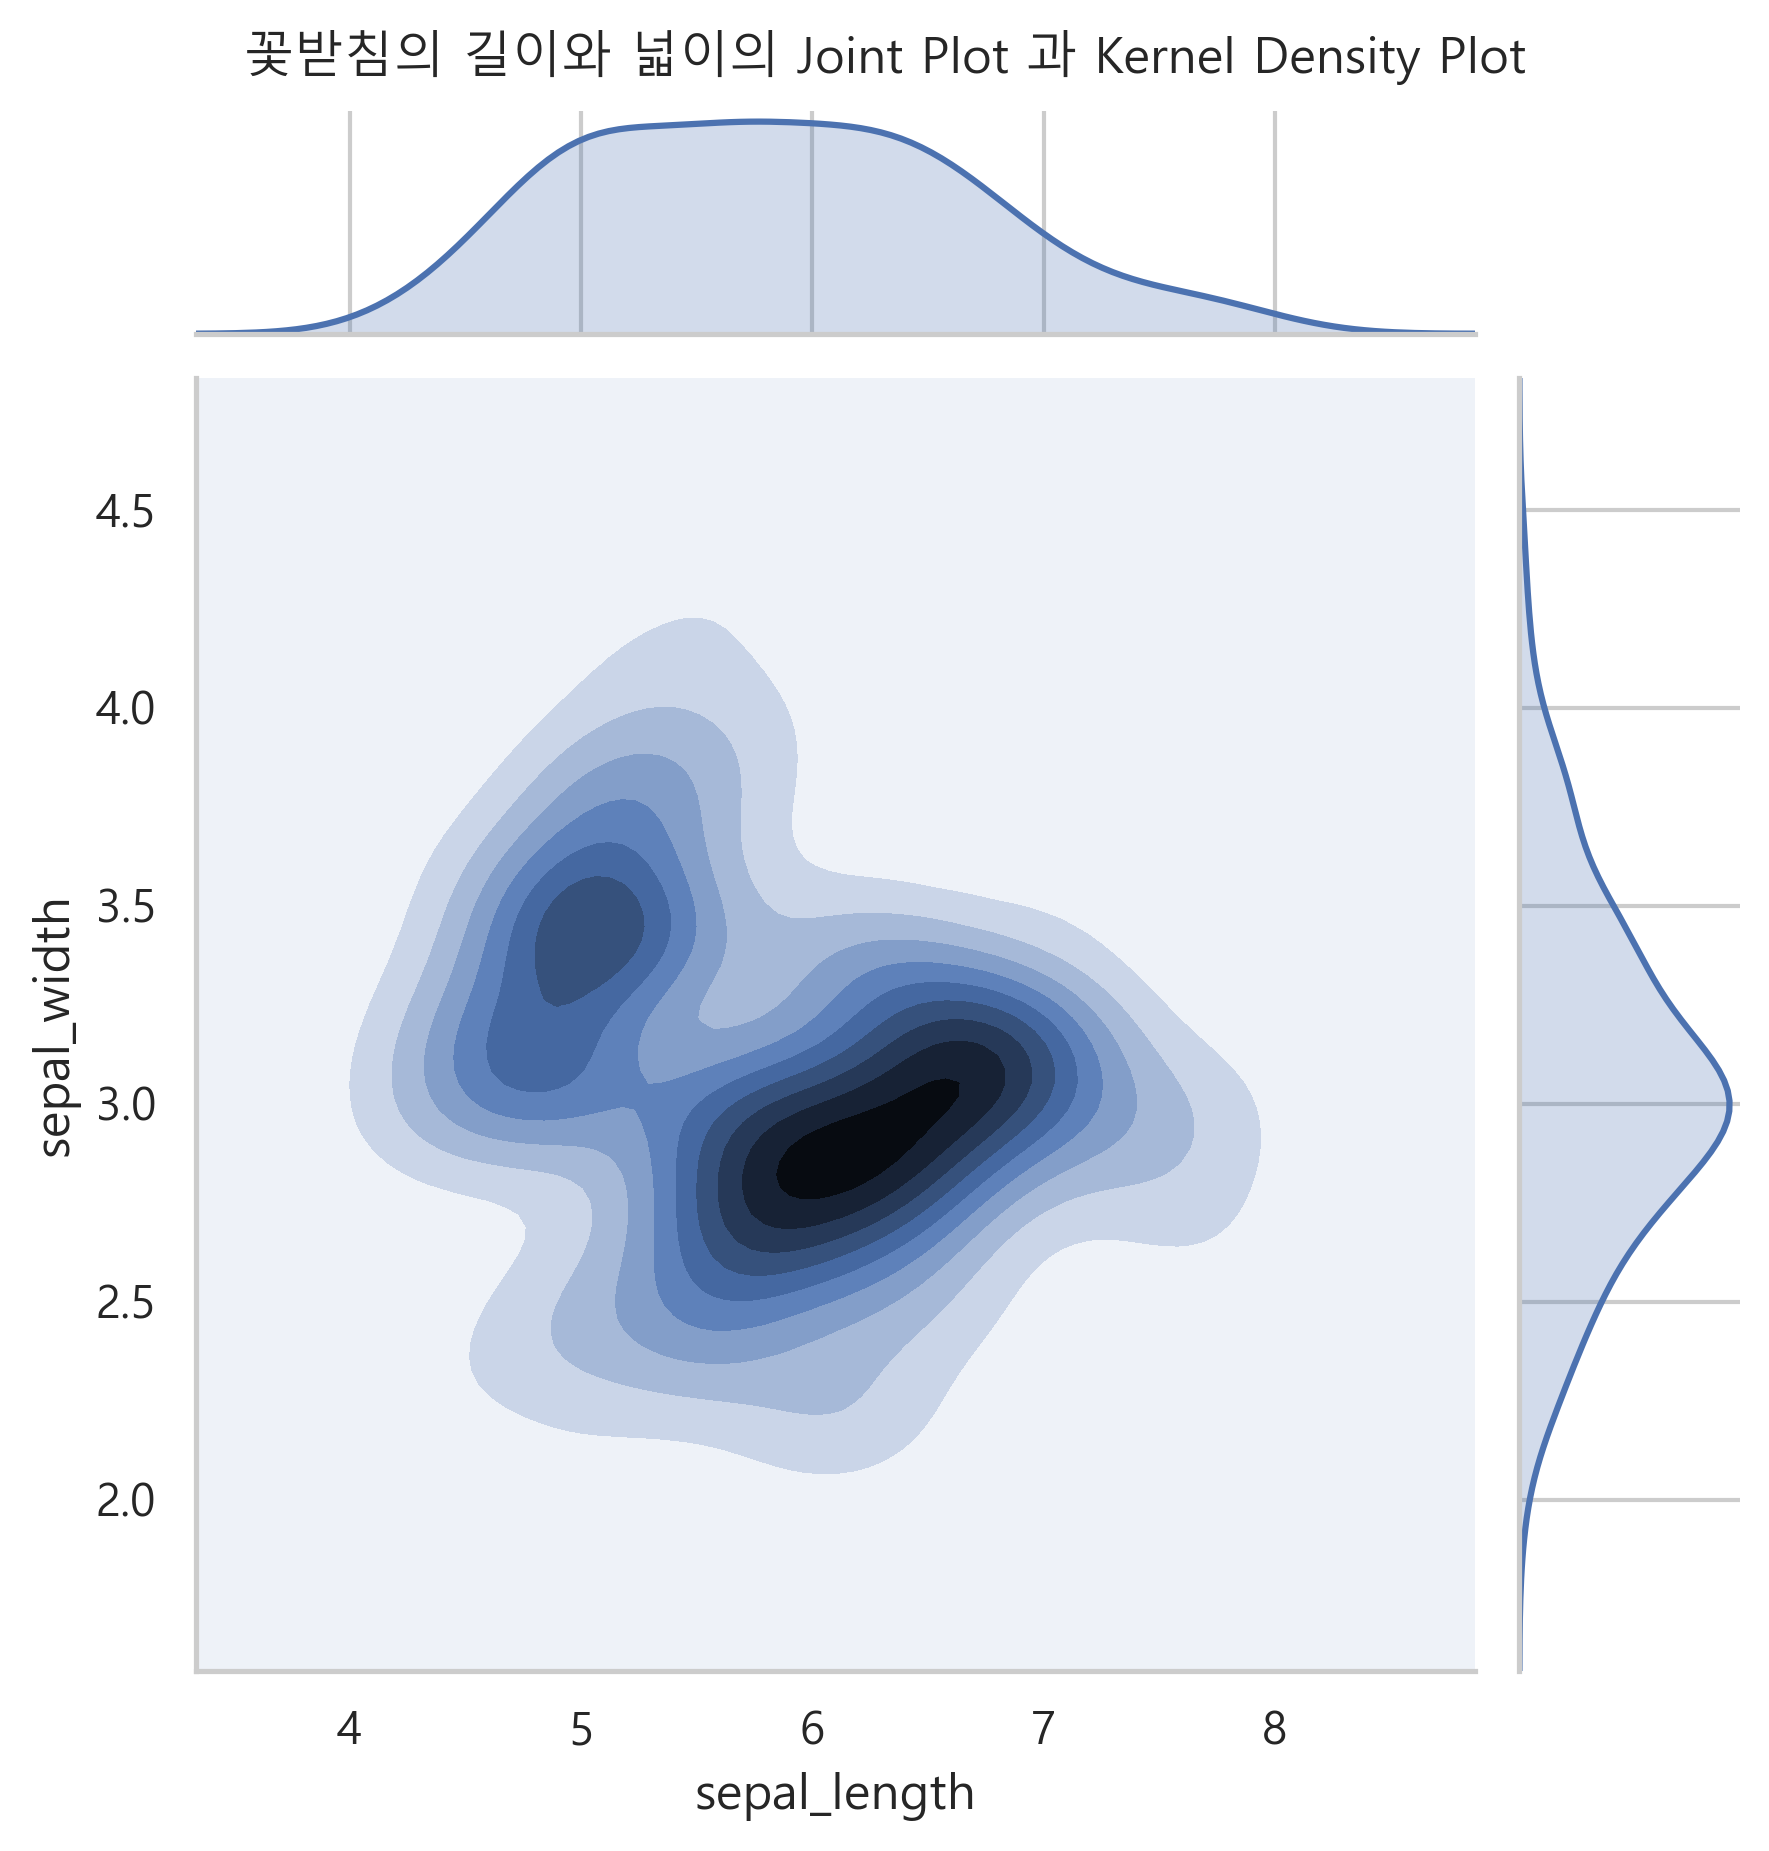

In [11]:
# kind='kde'이면 커널 밀도 히스토그램
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

### 다차원 실수형 데이터
- pairplot : 3차원 이상의 데이터
- 리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯
- 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램
- http://seaborn.pydata.org/generated/seaborn.pairplot.html

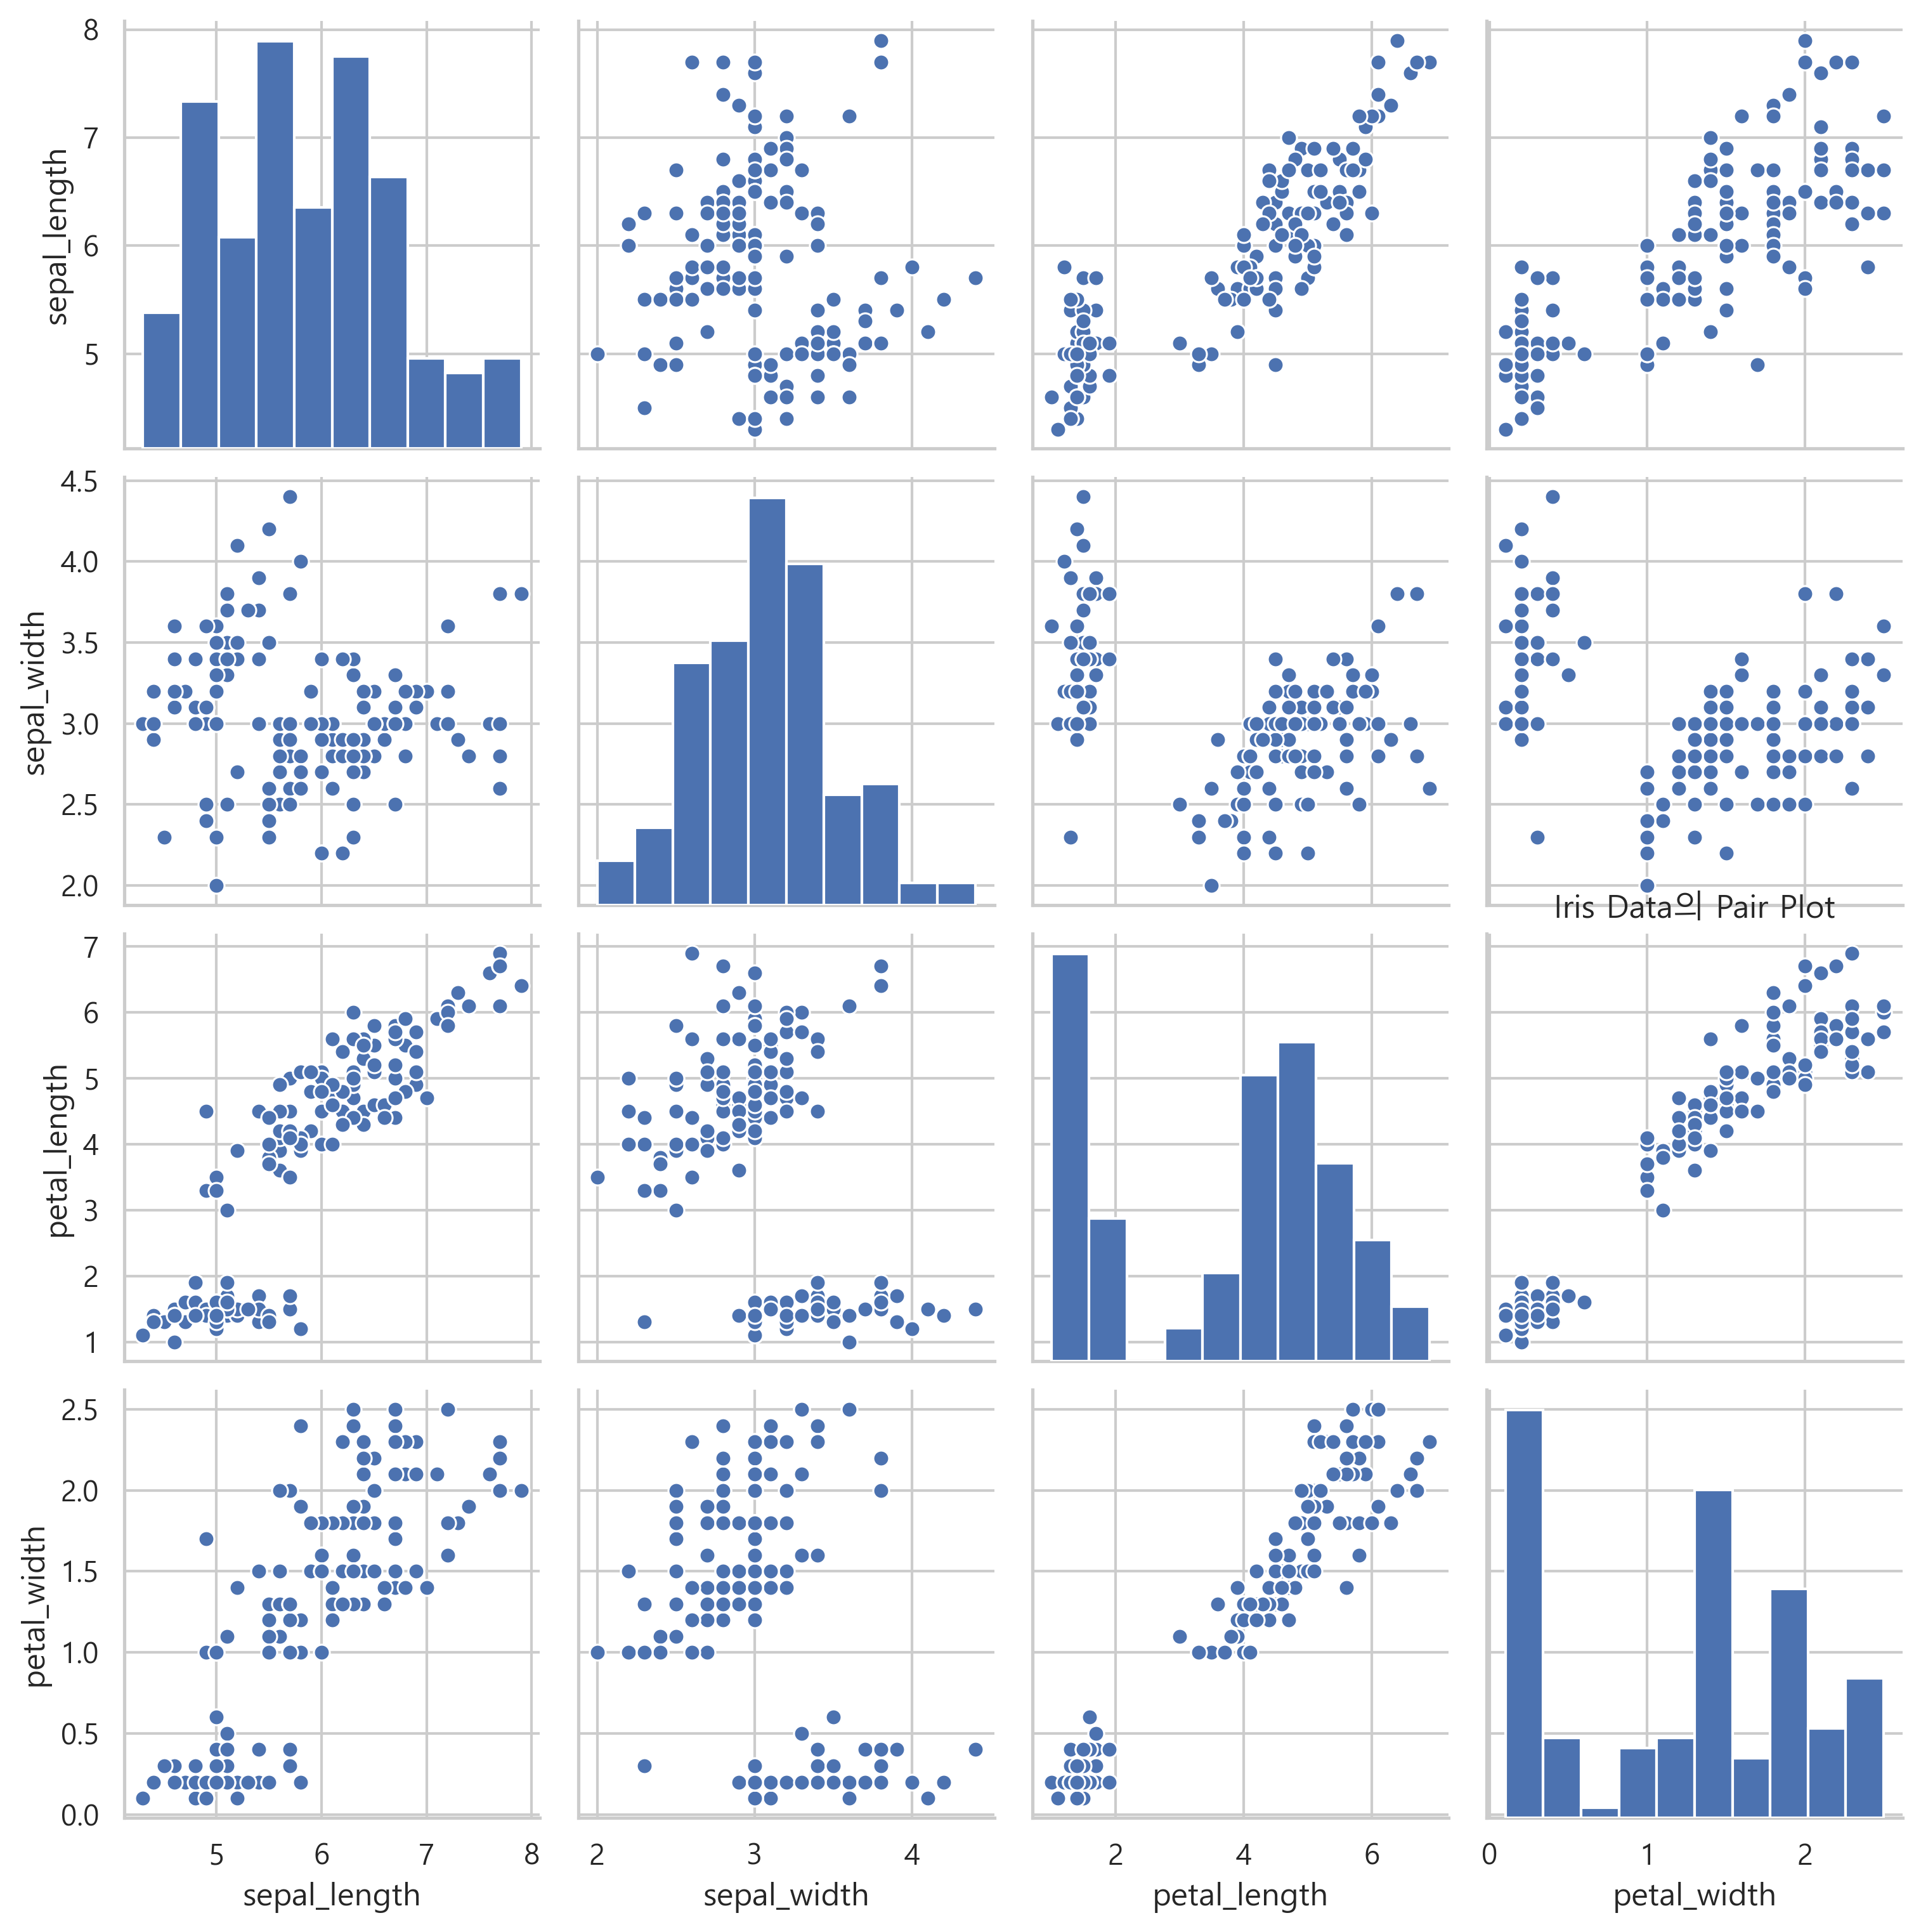

In [12]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

### 2차원 카테고리 데이터
- heatmap : 데이터가 2차원이고 모든 값이 카테고리 값
- http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [13]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


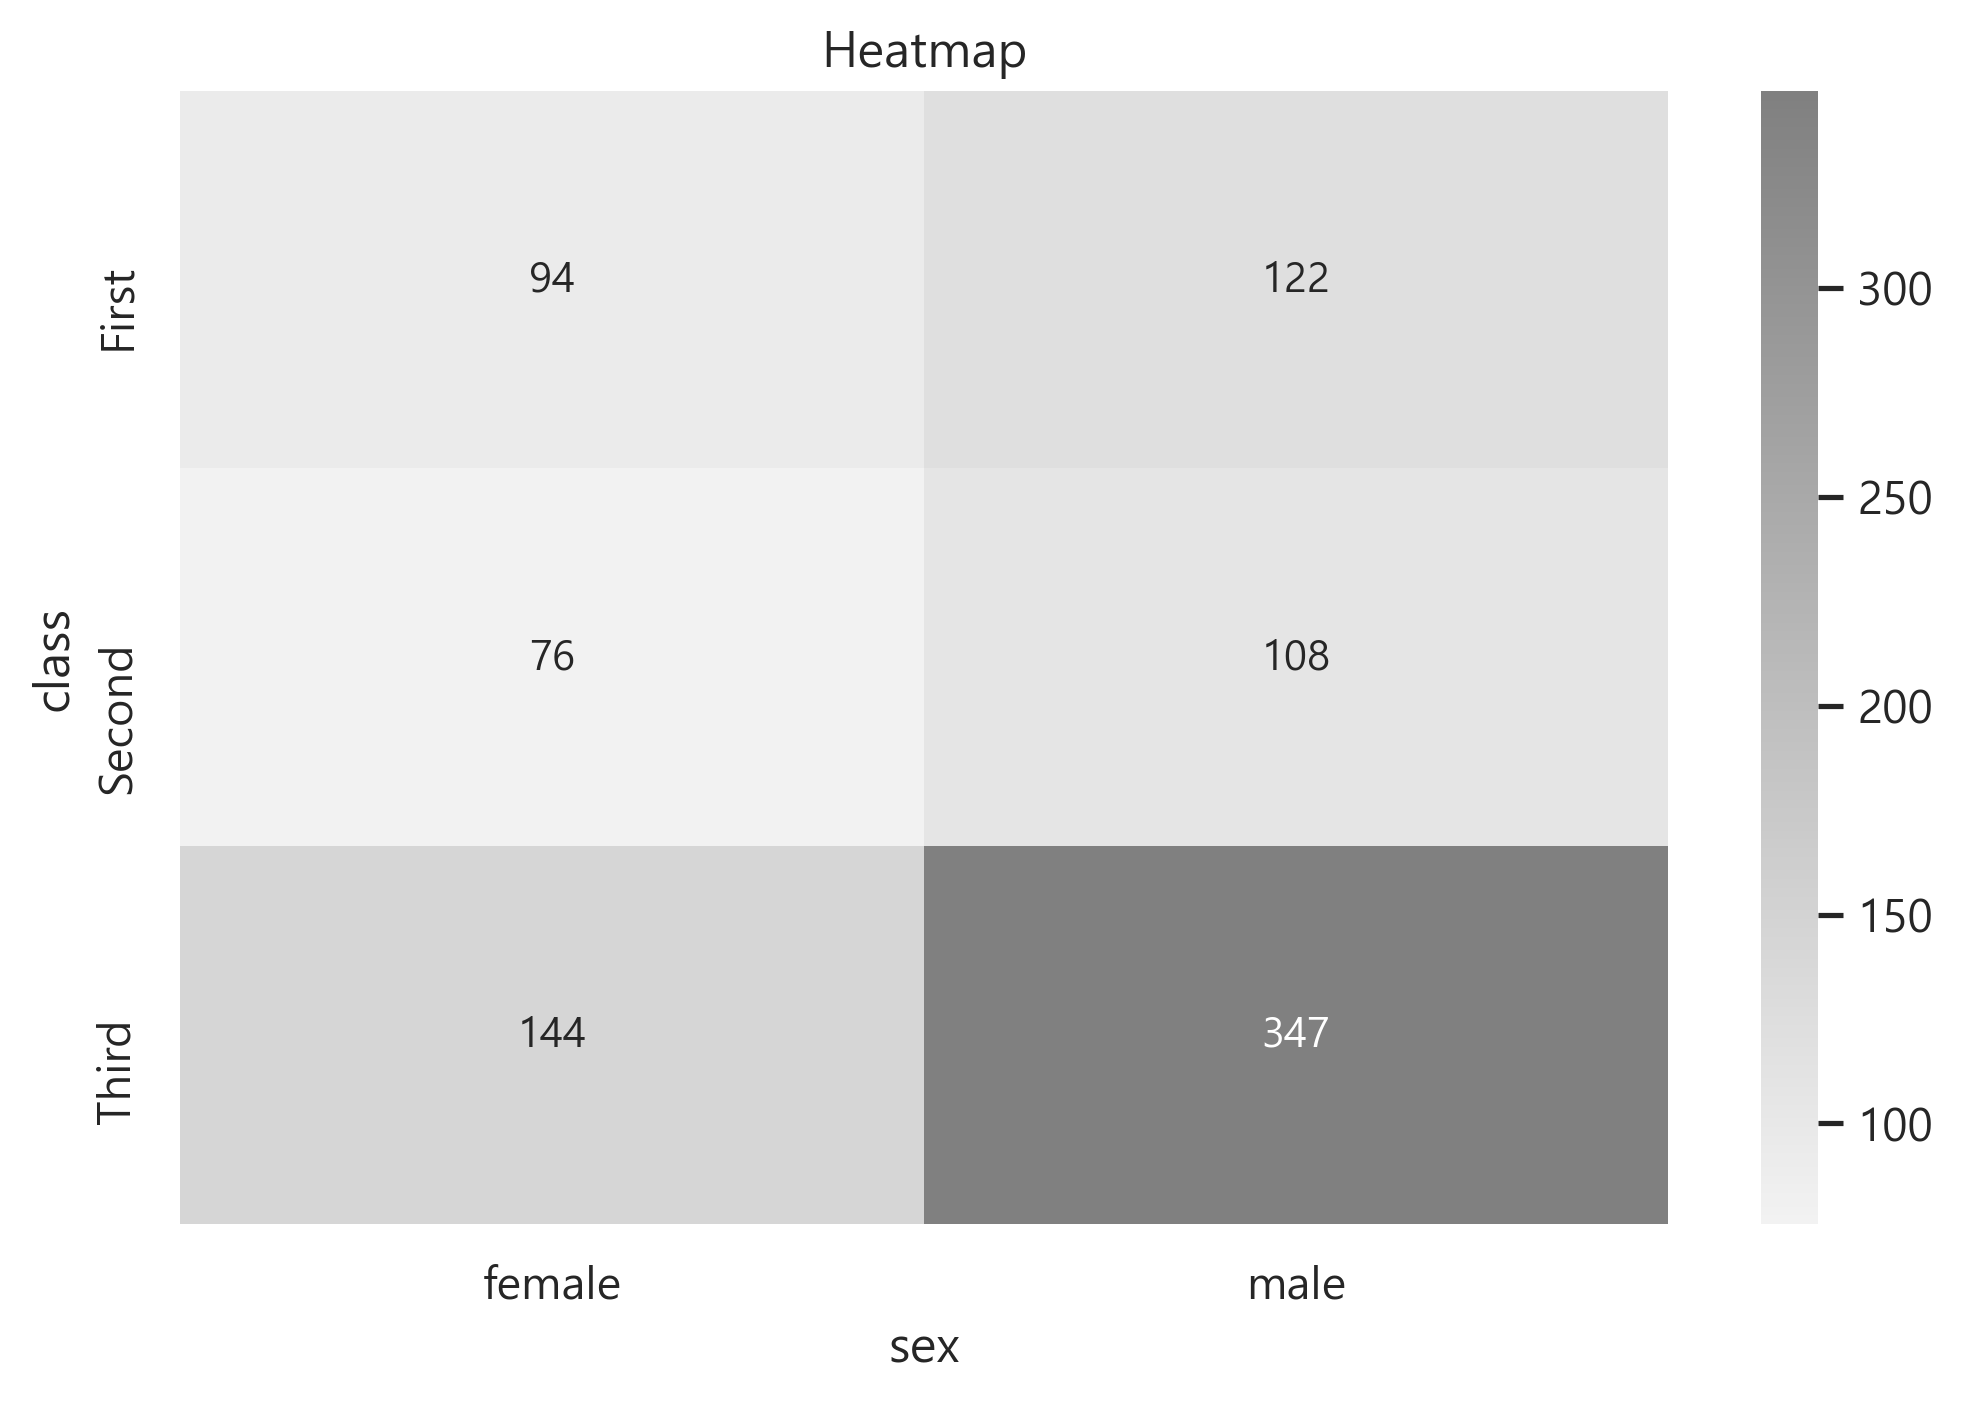

In [14]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()